In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import stats
import pandas as pd

In [2]:
general_dir = '../Data/MS_data/assignments' #'../../MS_data
file = 'assignments.csv'

In [3]:
# Change directory to the general_dir
try: os.chdir(general_dir)
except FileNotFoundError: pass

In [4]:
def line(x, slope, intercept):
    return (x*slope) + intercept
def fit_line(x,y,ax,c):
    opt = stats.linregress(x,y)
    m = opt.slope
    q = opt.intercept
    r2 = (opt.rvalue)**2
    x_range = np.arange(min(x),max(x),0.01)

    q_str = np.round(q,2)

    if q>=0:
        q_str = f'+ {q_str}'
    else:
        q_str = f'- {q_str}'

    label = f'$y = {np.round(m,2)}\\ x {q_str}$\n$R^2$ = {np.round(r2,4)}'

    ax.plot(x_range, line(x_range,m,q), linestyle='--',color = c,label=label)

    return np.round(m,4),np.round(q,4),np.round(r2,4)

In [5]:
df = pd.read_csv(file)
df = df.dropna()

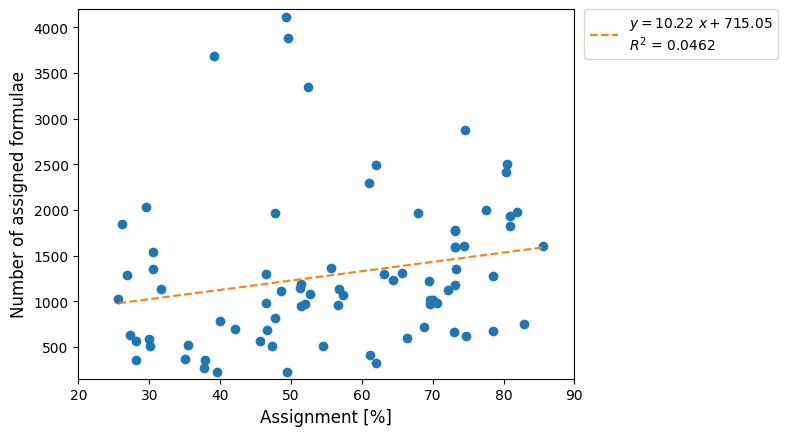

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['Assignment'],df['no of formulae'])
ax.set_xlim(20,90)
ax.set_ylim(150,4200)

ax.set_xlabel('Assignment [%]',fontsize=12)
ax.set_ylabel('Number of assigned formulae',fontsize=12)

m,q,r2 = fit_line(df['Assignment'],df['no of formulae'],ax,'tab:orange')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig.savefig(f"assignment_vs_formulae.svg", dpi = 600, facecolor = '#fff', bbox_inches='tight')
